In [12]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/colab proyect 2026/denue_15_1_csv/conjunto_de_datos/denue_inegi_15_1.csv', encoding="latin-1", low_memory=False)
df2 = pd.read_csv('/content/drive/MyDrive/colab proyect 2026/denue_15_2_csv/conjunto_de_datos/denue_inegi_15_2.csv', encoding="latin-1", low_memory=False)

In [26]:
df_completo = pd.concat([df1, df2], ignore_index=True)
df_completo['cve_mun'] = df_completo['cve_mun'].astype(int)


In [27]:
# Limpieza inmediata: Filtrar solo los municipios del corredor CTT + Tultitlan
nombres_corredor = [
    'Cuautitlán Izcalli',
    'Tlalnepantla de Baz',
    'Tepotzotlán',
    'Tultitlán'
]
# 2. Aplicamos el filtro usando la columna 'municipio'
df_corredor = df_completo[df_completo['municipio'].isin(nombres_corredor)].copy()

# 3. Verificación de seguridad (Sanity Check)
print(f"Empresas reales en el corredor: {df_corredor.shape[0]}")
print(f"Municipios confirmados en el dataset: {df_corredor['municipio'].unique()}")

print(f"Se tienen {df_corredor.shape[0]} empresas para analizar en el corredor.")

Empresas reales en el corredor: 84209
Municipios confirmados en el dataset: ['Cuautitlán Izcalli' 'Tlalnepantla de Baz' 'Tepotzotlán' 'Tultitlán']
Se tienen 84209 empresas para analizar en el corredor.


In [28]:
conteo_tamaño = df_corredor['per_ocu'].value_counts()
print("Distribución de empresas por tamaño de negocio:")
print(conteo_tamaño)

Distribución de empresas por tamaño de negocio:
per_ocu
0 a 5 personas        74300
6 a 10 personas        4342
11 a 30 personas       3379
31 a 50 personas        754
51 a 100 personas       601
101 a 250 personas      528
251 y más personas      305
Name: count, dtype: int64


In [29]:
df_corredor['sector_2d'] = df_corredor['codigo_act'].astype(str).str[:2]

clientes_potenciales = df_corredor[df_corredor['per_ocu'].isin(['51 a 100 personas', '101 a 250 personas', '251 y más personas'])]

resumen_sectores = clientes_potenciales['nombre_act'].value_counts().head(25)
print("Top 15 sectores con empresas grandes en el corredor CTT:")
print(resumen_sectores)

Top 15 sectores con empresas grandes en el corredor CTT:
nombre_act
Comercio al por menor en supermercados                                                                   60
Otro autotransporte foráneo de carga general                                                             54
Otros servicios de intermediación para el transporte de carga                                            41
Escuelas de educación media superior del sector público                                                  28
Fabricación de envases de cartón                                                                         26
Comercio al por menor en tiendas departamentales                                                         25
Comercio al por menor de automóviles y camionetas nuevos                                                 22
Comercio al por mayor de productos químicos para la industria farmacéutica y para otro uso industrial    20
Comercio al por mayor de abarrotes                                  

In [30]:
nichos_reales = {
    "Logistica_Transporte": '484', # Autotransporte de carga
    'Fab_Plastico_Envase': '3261', # Botellas y envases de plástico
    'Fab_carton_Papel': '3222', # Envases de Cartón
    'Comercio_mayorista': '46', # Abarrotes y Químicos (Mueven Volúmen)
    'Artes_Graficas_Competencia': '3231' # Impresión y Servicios
}

print(f"{'NICHO':<30} | {'GRANDES (Clientes)':<20} | {'PEQUEÑOS (Competencia)':<20} | {'RATIO'}")
print("-" * 85)

for nombre, codigo in nichos_reales.items():
  filtro_sector = df_corredor['codigo_act'].astype(str).str.startswith(codigo)

  # Definimos grandes como 51 personas o más
  grandes = df_corredor[filtro_sector & ~df_corredor['per_ocu'].isin(['0 a 5 personas', '6 a 10 personas', '11 a 30 personas', '31 a 50 personas'])].shape[0]
  # Definimos pequeños como competencia directa (microempresas)
  pequeños = df_corredor[filtro_sector & df_corredor['per_ocu'].isin(['0 a 5 personas', '6 a 10 personas'])].shape[0]

  ratio = grandes / pequeños if pequeños > 0 else grandes

  print(f"{nombre:<30} | {grandes:<20} | {pequeños:<20} | {ratio:.2f}")

NICHO                          | GRANDES (Clientes)   | PEQUEÑOS (Competencia) | RATIO
-------------------------------------------------------------------------------------
Logistica_Transporte           | 81                   | 177                  | 0.46
Fab_Plastico_Envase            | 73                   | 78                   | 0.94
Fab_carton_Papel               | 35                   | 47                   | 0.74
Comercio_mayorista             | 225                  | 36309                | 0.01
Artes_Graficas_Competencia     | 16                   | 299                  | 0.05


In [31]:
# Filtramos potenciales clientes de alta oportunidad
sectores_oro = ['3261', '484'] #Plastico y Transporte
clientes_oro = df_corredor[
    df_corredor['codigo_act'].astype(str).str.startswith(tuple(sectores_oro)) &
    df_corredor['per_ocu'].isin(['51 a 100 personas', '101 a 250 personas', '251 y más personas'])
]

# Mostramos los primeros 10 para ver quiénes son
print(clientes_oro[['nom_estab', 'municipio', 'per_ocu', 'nombre_act']].head(10))

                               nom_estab            municipio  \
49080          ACOJINAMIENTOS SINTETICOS  Tlalnepantla de Baz   
49096                            ADFOAMS          Tepotzotlán   
50129                              BEMIS            Tultitlán   
50131                              BEPSA          Tepotzotlán   
50606  BPREX PLASTIC PACKAGING DE MEXICO  Tlalnepantla de Baz   
50625                              CABEL  Tlalnepantla de Baz   
53383                 CARTONERA PLASTICA   Cuautitlán Izcalli   
53469     CENTRO MODULAR DE POLIESTIRENO          Tepotzotlán   
53595                       COLOMBIN BEL  Tlalnepantla de Baz   
53659                   COMPAÑIA PLASVIC  Tlalnepantla de Baz   

                  per_ocu                                         nombre_act  
49080  101 a 250 personas      Fabricación de espumas y productos de uretano  
49096   51 a 100 personas      Fabricación de espumas y productos de uretano  
50129  251 y más personas  Fabricación de bolsa

In [32]:
# Analicemos la calidad de los prospectos en los sectores de Oportunidad (Plástico y Logística)
sectore_interes = ["326", "484", "493", "322"] # Plástico, Transporte, Almacén, Cartón

df_nichos = df_corredor[df_corredor['codigo_act'].astype(str).str.startswith(tuple(sectore_interes))]

# 1. ¿Cuántos tienen correo o sitio web? (Indicador de qué tan fácil es contactarlos)
df_nichos['tiene_email'] = df_nichos['correoelec'].notna()
df_nichos['tiene_web'] = df_nichos['www'].notna()

resumen_final = df_nichos.groupby(['municipio', 'per_ocu']).agg({
    'id': 'count',
    'tiene_email': 'sum',
    'tiene_web': 'sum',
}).rename(columns={'id':'total_empresas'})

print("Radiografía de Contacto por Municipio y Tamaño:")
print(resumen_final)


Radiografía de Contacto por Municipio y Tamaño:
                                        total_empresas  tiene_email  tiene_web
municipio           per_ocu                                                   
Cuautitlán Izcalli  0 a 5 personas                  53           17         11
                    101 a 250 personas              33           25         19
                    11 a 30 personas                45           23         11
                    251 y más personas              24           23         16
                    31 a 50 personas                35           27         18
                    51 a 100 personas               19           19         12
                    6 a 10 personas                 38           14          8
Tepotzotlán         0 a 5 personas                  17            1          3
                    101 a 250 personas              11            8          4
                    11 a 30 personas                17           12          3
    

/tmp/ipython-input-1128974290.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nichos['tiene_email'] = df_nichos['correoelec'].notna()
/tmp/ipython-input-1128974290.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nichos['tiene_web'] = df_nichos['www'].notna()


In [33]:
# 1. Definimos los municipios de alta prioridad (tus vecinos más cercanos)
prioridad_zona = ['Cuautitlán Izcalli', 'Tepotzotlán']

# 2. Filtramos los sectores de alto ratio (Plástico, Cartón y Logística Pesada)
sectores_oro = ['3261', '3222', '4841']

# 3. Creamos la lista VIP: Empresas grandes/medianas en esos sectores y zonas
prospectos_vip = df_corredor[
    (df_corredor['municipio'].isin(prioridad_zona)) &
    (df_corredor['codigo_act'].astype(str).str.startswith(tuple(sectores_oro))) &
    (~df_corredor['per_ocu'].isin(['0 a 5 personas', '6 a 10 personas'])) # Solo medianas y grandes
].copy()

# 4. Seleccionamos columnas clave para tu labor de venta
columnas_contacto = [
    'nom_estab', 'nombre_act', 'per_ocu', 'municipio',
    'nomb_asent', 'cod_postal', 'correoelec', 'www'
]

# Ordenamos por tamaño para ver primero a los "peces gordos"
prospectos_vip = prospectos_vip[columnas_contacto].sort_values(by='per_ocu', ascending=False)

# Guardamos a un CSV para que lo puedas abrir en Excel
prospectos_vip.to_csv('prospectos_vip_izcalli_tepo.csv', index=False, encoding='latin-1')

print(f"¡Éxito! Hemos identificado {prospectos_vip.shape[0]} prospectos de alto valor.")
prospectos_vip.head(15)

¡Éxito! Hemos identificado 159 prospectos de alto valor.


,nom_estab,nombre_act,per_ocu,municipio,nomb_asent,cod_postal,correoelec,www
49096,ADFOAMS,Fabricación de espumas y productos de uretano,51 a 100 personas,Tepotzotlán,COLONIA TEPOTZOTLAN,NaN,E.BURGOS@ADFOAMS.MX,NaN
53371,CARTO REY,Fabricación de envases de cartón,51 a 100 personas,Cuautitlán Izcalli,XHALA,54714.0,RECURSOSHUMANOS.CARTOREY@GMAIL.COM,WWW.CARTOREY.COM.MX
496187,TRANSPORTES Y SERVICIOS ADICIONALES SANSON,Otro autotransporte foráneo de carga general,51 a 100 personas,Tepotzotlán,TLACATECO,54617.0,SANSN.EDGAR@GMAIL.COM,NaN
496171,TRANSPORTES VAZQUEZ,Otro autotransporte local de carga general,51 a 100 personas,Cuautitlán Izcalli,SAN JOSE PUENTE GRANDE,NaN,JMVAZ_ORO@HOTMAIL.COM,NaN
495957,TRANSPORTES GARVY,Otro autotransporte foráneo de carga general,51 a 100 personas,Cuautitlán Izcalli,EL ROSARIO,NaN,CONTABILIDAD@TRANSPORTESGARVY.COM,WWW.TRANSPORTESGARVY.COM
495090,KUDAI TRANSPORTES,Otro autotransporte foráneo de carga general,51 a 100 personas,Cuautitlán Izcalli,CAPUL,54603.0,TRANSPORTESKUDAI@HOTMAIL.COM,WWW.TRANSPORTESKUDAI.COM
494908,GLP,Otro autotransporte foráneo de carga general,51 a 100 personas,Cuautitlán Izcalli,SAN MATEO IXTACALCO SECCION EL SABINO,NaN,AUXILIAR@TRANSPORTESGLP.COM,NaN
494550,BONAR TRANSPORTES,Otro autotransporte foráneo de carga general,51 a 100 personas,Cuautitlán Izcalli,CUAMATLA,54730.0,TGAVIRIA@BONARTRANSPORTES.COM,WWW.BONARTRANSPORTES.COM
494210,APE TRANSPORTES ESPECIALIZADOS,Otro autotransporte foráneo de carga general,51 a 100 personas,Cuautitlán Izcalli,CUAMATLA,54730.0,APESA@APESA.NET,NaN
59748,SONOCO,Fabricación de envases de cartón,51 a 100 personas,Cuautitlán Izcalli,EX-HACIENDA SAN MIGUEL,54715.0,JAQUELINE.ZABA@SONOCO.COM,WWW.SONOCO.MX


/tmp/ipython-input-1755011891.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Ratio', y='Nicho', data=df_plot, palette='viridis')


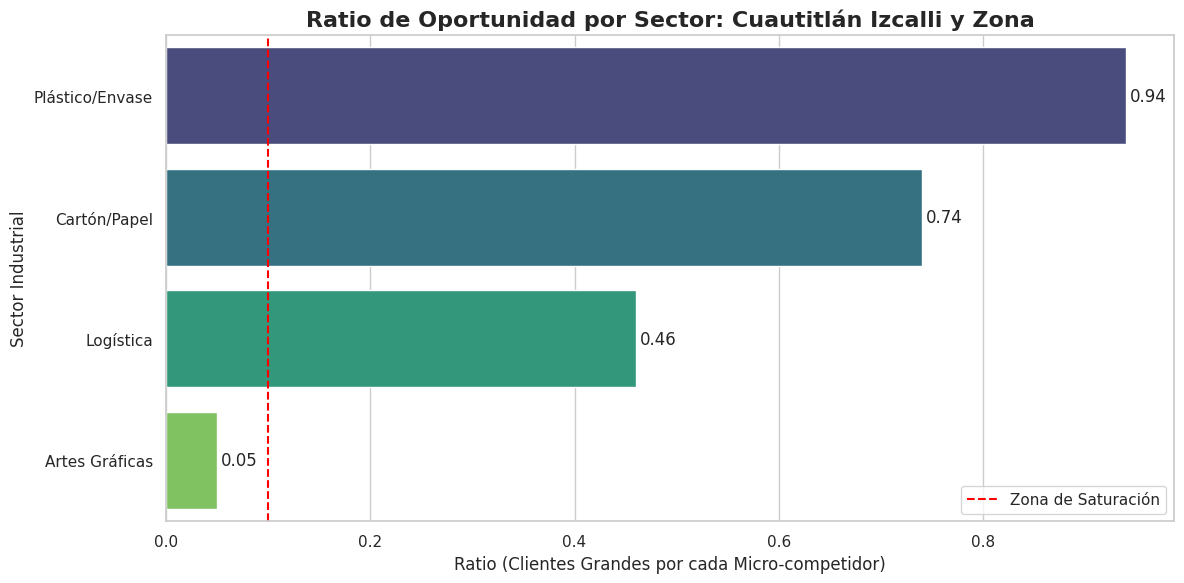

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Datos para la gráfica (usaremos los ratios que calculamos antes)
# Nota: Asegúrate de usar los valores que te salieron en el paso anterior
datos_grafica = {
    'Nicho': ['Plástico/Envase', 'Cartón/Papel', 'Logística', 'Artes Gráficas'],
    'Ratio': [0.94, 0.74, 0.46, 0.05]
}

df_plot = pd.DataFrame(datos_grafica)

# Crear gráfica de barras
barplot = sns.barplot(x='Ratio', y='Nicho', data=df_plot, palette='viridis')

# Añadir títulos y etiquetas
plt.title('Ratio de Oportunidad por Sector: Cuautitlán Izcalli y Zona', fontsize=16, fontweight='bold')
plt.xlabel('Ratio (Clientes Grandes por cada Micro-competidor)', fontsize=12)
plt.ylabel('Sector Industrial', fontsize=12)

# Añadir una línea roja de "Saturación"
plt.axvline(x=0.1, color='red', linestyle='--', label='Zona de Saturación')
plt.legend()

# Mostrar valores en las barras
for i in barplot.containers:
    barplot.bar_label(i, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1900402541.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='municipio', y='Cantidad', data=mapa_datos, palette='magma')


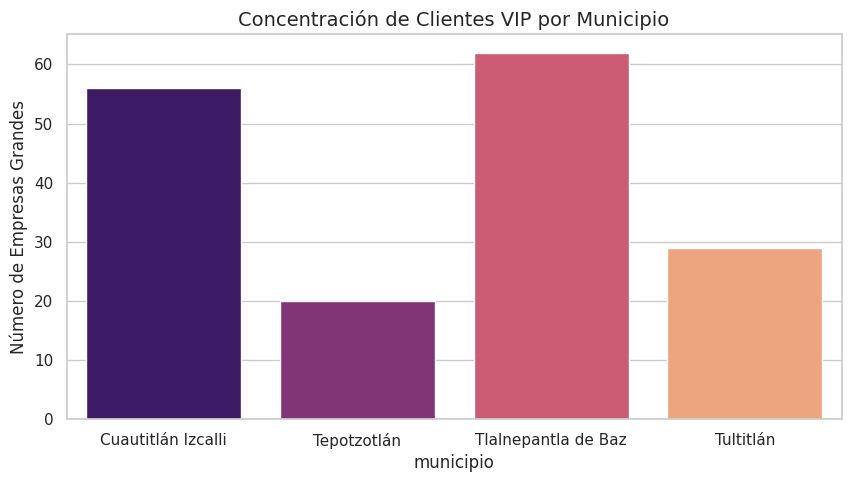

In [35]:
# Preparar datos para el mapa de calor
# Contamos cuántas empresas grandes hay por municipio en los nichos de oro
sectores_finales = ['3261', '3222', '4841']
df_calor = df_corredor[
    (df_corredor['codigo_act'].astype(str).str.startswith(tuple(sectores_finales))) &
    (df_corredor['per_ocu'].isin(['51 a 100 personas', '101 a 250 personas', '251 y más personas']))
]

mapa_datos = df_calor.groupby('municipio').size().reset_index(name='Cantidad')

plt.figure(figsize=(10, 5))
sns.barplot(x='municipio', y='Cantidad', data=mapa_datos, palette='magma')
plt.title('Concentración de Clientes VIP por Municipio', fontsize=14)
plt.ylabel('Número de Empresas Grandes')
plt.show()

In [36]:
# Definimos los grupos por código SCIAN

In [39]:
scian_productores = ['3261', '3222'] # Fab. de plástico y cartón
scian_consumidores = ['4841', '4931'] # Transporte y Almacenaje

# Creamos las dos listas
aliados = prospectos_vip[
    prospectos_vip['nombre_act'].str.lower().str.contains('fabricación|manufactura|industria|espumas|envases', case=False)
    ].copy()
clientes_puros = prospectos_vip[
    prospectos_vip['nombre_act'].str.lower().str.contains('transporte|almacenamiento|comercio|carga', case=False)
    ].copy()

print(f"Estrategia Corregida:")
print(f"1. Aliados para Maquila (Productores): {aliados.shape[0]} empresas")
print(f"2. Clientes Directos (Consumidores): {clientes_puros.shape[0]} empresas")

# Verificación rápida: si 'aliados' sigue en 0, imprimamos qué nombres hay para ver qué falló
if aliados.shape[0] == 0:
    print("\nRevisando nombres de actividades disponibles:")
    print(prospectos_vip['nombre_act'].unique()[:5])

Estrategia Corregida:
1. Aliados para Maquila (Productores): 79 empresas
2. Clientes Directos (Consumidores): 80 empresas


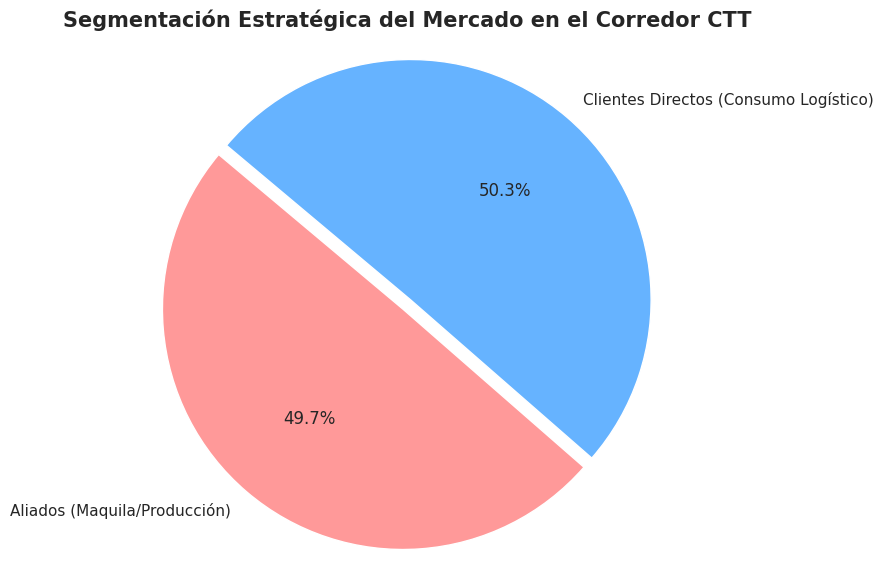

In [40]:
import matplotlib.pyplot as plt

# Datos para la gráfica de pastel
labels = ['Aliados (Maquila/Producción)', 'Clientes Directos (Consumo Logístico)']
sizes = [aliados.shape[0], clientes_puros.shape[0]]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05, 0))
plt.title('Segmentación Estratégica del Mercado en el Corredor CTT', fontsize=15, fontweight='bold')
plt.axis('equal')
plt.show()

/tmp/ipython-input-2475867542.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ratio', y='Nicho', data=df_plot, palette='viridis', ax=ax1)


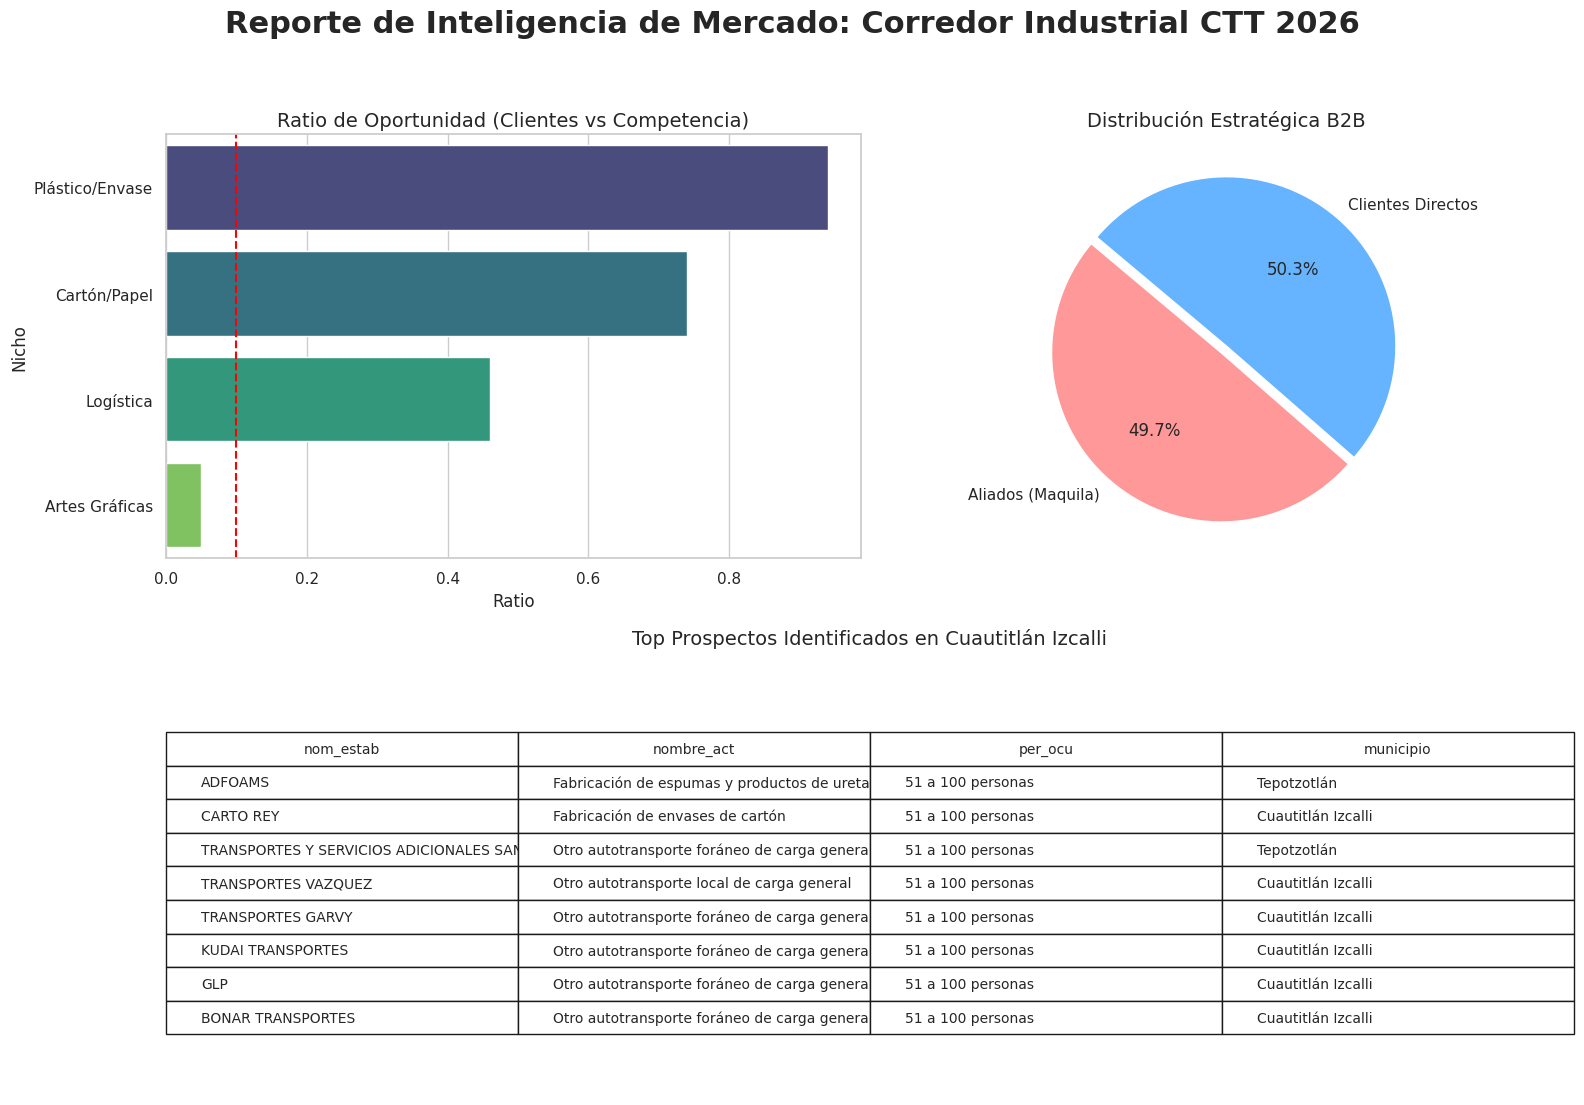

In [41]:
# Creamos una figura grande (póster)
fig = plt.figure(figsize=(16, 12))
fig.suptitle('Reporte de Inteligencia de Mercado: Corredor Industrial CTT 2026', fontsize=22, fontweight='bold', y=0.95)

# 1. Gráfica de Ratios (Oportunidad)
ax1 = plt.subplot(2, 2, 1)
datos_grafica = {'Nicho': ['Plástico/Envase', 'Cartón/Papel', 'Logística', 'Artes Gráficas'], 'Ratio': [0.94, 0.74, 0.46, 0.05]}
df_plot = pd.DataFrame(datos_grafica)
sns.barplot(x='Ratio', y='Nicho', data=df_plot, palette='viridis', ax=ax1)
ax1.set_title('Ratio de Oportunidad (Clientes vs Competencia)', fontsize=14)
ax1.axvline(0.1, color='red', linestyle='--')

# 2. Gráfica de Estrategia (Pastel)
ax2 = plt.subplot(2, 2, 2)
labels = ['Aliados (Maquila)', 'Clientes Directos']
sizes = [aliados.shape[0], clientes_puros.shape[0]]
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'], explode=(0.05, 0))
ax2.set_title('Distribución Estratégica B2B', fontsize=14)

# 3. Tabla de Prospectos VIP (Izcalli)
ax3 = plt.subplot(2, 1, 2)
ax3.axis('off')
columnas_nice = ['nom_estab', 'nombre_act', 'per_ocu', 'municipio']
# Tomamos los top 8 para que quepan bien
tabla_data = prospectos_vip[columnas_nice].head(8)
the_table = ax3.table(cellText=tabla_data.values, colLabels=tabla_data.columns, loc='center', cellLoc='left')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1, 2)
ax3.set_title('Top Prospectos Identificados en Cuautitlán Izcalli', fontsize=14, pad=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.savefig('reporte_final_cttt.png', dpi=300) # Esto guarda la imagen en tu Colab
plt.show()